In [2]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import wfdb
import biosignalsnotebooks as bsnb
from wfdb import processing
from matplotlib import pyplot as plt
from scipy import signal
from biosppy.signals import ecg
np.set_printoptions(threshold=sys.maxsize)
import umap
import sklearn.utils as slu
from sklearn.model_selection import LeaveOneOut

In [2]:
store = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/100'
record = wfdb.rdrecord(store, sampto=100)
# wfdb.plot_wfdb(record, title='Record 100 from MIT-BIH Arrhythmia database') 
# display(record.__dict__)

In [3]:
# data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)

In [3]:
# sig, fields = wfdb.rdsamp(store, channels=[0])
# # xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# # xqrs.detect()
# # wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])
# ann_ref = wfdb.rdann(store, 'atr')
# r_peaks = ann_ref.sample[0:-1]
# print(r_peaks)

In [5]:
# file_path = glob.glob('./mit-bih-arrhythmia-database-1.0.0/*.atr')
# files = [i[:-4] for i in file_path]
# files.sort()


# file = './mit-bih-arrhythmia-database-1.0.0/100'

# ann_ref = wfdb.rdann(file, 'atr')

# number_of_rpeaks = len(ann_ref.symbol)

# values = np.zeros((48,2))
# classes = ['N','R','L','V','A','E']
# for i in range(len(files)):
#     signals, fields = wfdb.rdsamp(files[i])
#     annotation = wfdb.rdann(files[i], 'atr')
#     for j in classes:
#         ids = np.in1d(annotation.symbol, j)
#         beats = annotation.sample[ids]
#         values[i] = [j,len(beats)]

# print(values)



# n = ['N']
# v = ['V']

# check_normal = np.in1d(ann_ref.symbol, n)
# check_v = np.in1d(ann_ref.symbol, v)

# normal_beats = ann_ref.sample[check_normal]
# v_beats = ann_ref.sample[check_v]

# print(len(check_normal))

# comparitor = processing.compare_annotations(ann_ref.sample[1:], xqrs.qrs_inds, int(0.1 * fields['fs']), sig[:,0])
# comparitor.print_summary()
# comparitor.plot()

In [4]:
def get_data(path):
    file_path = glob(path)
    files = [i[:-4] for i in file_path]
    files.sort()
    return files

In [5]:
path = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/*.atr'
file_list = get_data(path)


## Histogram

(112647,)


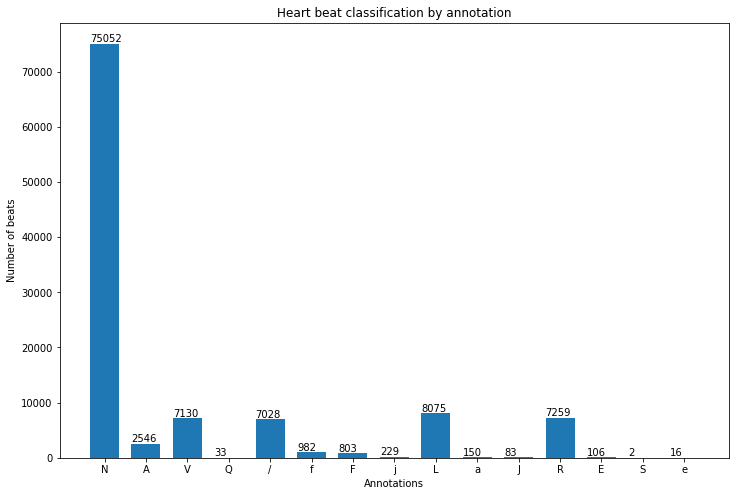

In [8]:

# print(len(get_data()))


ann_list = []
for i in range(len(file_list)): #going through each of the 48 files...
    data_file = file_list[i] #one file of the 48
    record = wfdb.rdsamp(data_file)  #returns an array of the sample
    ann_ref = wfdb.rdann(data_file, 'atr') #reading annotations in the file
    ann_list.extend(ann_ref.symbol)
    
ann_array = np.array(ann_list)
print(ann_array.shape)
# annp = wfdb.rdann(file_list[7], 'atr')
# print(len(annp.symbol))
# print(annp.label_store)



actual_beats = ['N','L','R','B','A','a','J','S','V','r',
             'F','e','j','n','E','/','f','Q','?']

ann_dict = {}

for i in ann_array:
    ann_dict[i] = ann_dict.get(i,0)+1

ann_dict = {k:v for k,v in ann_dict.items() if k in actual_beats}


plt.figure(figsize=(12,8))

xlocs, xlabs = plt.xticks()

bars = plt.bar(list(ann_dict.keys()), ann_dict.values(), width=.7)
plt.title("Heart beat classification by annotation")
xlocs = [i for i in ann_dict.keys()]
ylabs = [i for i in ann_dict.values()]

plt.xlabel("Annotations")
plt.ylabel("Number of beats")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 300, yval)

# xlocs = [i/2 for i in range(len(ann_dict.keys()))]
# for i, v in enumerate(ann_dict.values()):
#     plt.text((xlocs[i] - 0.25, v + 0.01, str(v)))

# print(np.array(ann_ref.symbol).shape)
# print(record[1].get('fs'))
# print(record[0].shape)
# print(len(ann_ref.num)) #prints number of annotations (no of beats) 
# # num is the labelled annotation number for each annotation
# print(ann_ref.symbol)

## Visualising the Data per Patient

In [9]:
#Visualising the data
file_index = 1 #0 to 47 files in the database

current_file = file_list[file_index]

record = wfdb.rdsamp(current_file)
ann_ref = wfdb.rdann(current_file, 'atr')
r = record[0].T
print(r.shape)


samp_start = 0
samp_end = 6500
samples = samp_end - samp_start
#picking first record, picking first channel, 
#going from samp_start to samp_end in that channel
channel = record[0][samp_start:samp_end, 1]
#record is coming fromt the FIRST cell using the first file, change it there to see next file
# time = (np.arange(samples, dtype='float')+ samp_start)/record[1].get('fs')

# plt.figure(figsize=(20,10))
# plt.plot(time,channel)


peak_location=np.logical_and(ann_ref.sample >= samp_start, ann_ref.sample < samp_end)
#.sample returns a numpy array containing the annotation locations in samples relative to the beginning of the record
#i.e., where each beat is
anns = ann_ref.sample[peak_location] - samp_start
ann_types = np.array(ann_ref.symbol)
req_ann_types = ann_types[peak_location]

print(ann_ref.sample.shape)
print(anns.shape)

# print(ann_types.shape, req_ann_types.shape)


# ann_time = time[anns]
# plt.plot(ann_time, np.ones_like(ann_time)*channel.max()*1.4,'ro')


# for index, annotation in enumerate(anns):
#     plt.annotate(ann_types[index], xy = (time[annotation], channel.max()*1.1))

    
# plt.xlim([samp_start / record[1].get('fs'), (samp_end/record[1].get('fs'))+1])
# plt.xlabel('offset')
# plt.ylabel(record[1].get('sig_name')[1])
# plt.show()
# q = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
# print(q.shape)
# for i, z in enumerate(q):
#     print(z)

(2, 650000)
(1874,)
(21,)


In [10]:
arr = np.array([[1,2,3,4],[5,6,7,8]])
print(arr.shape)
s = np.array([1,2])
a = np.split(arr,s)
print(a)

(2, 4)
[array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]]), array([], shape=(0, 4), dtype=int64)]


In [11]:
import tensorflow as tf

In [7]:
for file in file_list:
    
    path = file.split('/')
    fn = path[-1]
    record = wfdb.rdsamp(file)
    ecg_val = record[0].T # 2, 650000
    ann_ref = wfdb.rdann(file,'atr')
    ann_list = np.array(ann_ref.symbol)
    ann_number = np.zeros_like(ann_list, dtype='float')
    
    # encode the annotations as numbers
    for annid, anno in enumerate(ann_list):
        if anno == 'N':
            ann_number[annid] = 1.0
        elif anno == 'L':
            ann_number[annid] = 2.0
        elif anno == 'R':
            ann_number[annid] = 3.0
        elif anno == 'A':
            ann_number[annid] = 4.0
        elif anno == 'V':
            ann_number[annid] = 5.0
        elif anno == 'F':
            ann_number[annid] = 6.0
        elif anno == 'f':
            ann_number[annid] = 7.0
        elif anno == '/':
            ann_number[annid] = 8.0
            
    all_ann_numbers = np.zeros_like(ecg_val[0], dtype='float')
    all_ann_numbers[ann_ref.sample] = ann_number
    
    for ch_id, channel in enumerate(ecg_val): #enumerates the 2 channels - so 0 and 1
        channel_name = record[1].get('sig_name')[ch_id]
        print("ECG channel: ", channel_name)
        
#         ecg_output = ecg.ecg(signal=channel, sampling_rate=360, show=False)
        
        # center the r peak
        rpeak_indices = ann_ref.sample[1:-1] #2272
        all_beats = []
        for i,peak in enumerate(rpeak_indices):
            start,end = peak-256//2, peak+256//2
            if start < 0:
                start = 0
            diff = 256 - len(channel[start:end])
            if diff > 0:
                padding = np.zeros(diff, dtype='float')
                padded_channel = np.append(padding, channel[start:end])
                all_beats.append(padded_channel)
            else:
                all_beats.append(channel[start:end])

#         for i, i_val in enumerate(rpeak_indices):
            # obtain annotation for each beat
            if peak < 10:
                from_i = 0
            else:
                from_i = peak - 10
            to_i = peak + 10
            anno = all_ann_numbers[from_i:to_i].max()

            
            # standardise the data
            all_beats[i] = (all_beats[i]-np.mean(all_beats[i]))/np.std(all_beats[i])
            
            # append the annotation to each beat
            all_beats[i] = np.append(all_beats[i], anno)
            
            # append file number
            all_beats[i] = np.append(all_beats[i], fn)

            # append channel number (0 or 1)
            all_beats[i] = np.append(all_beats[i], ch_id)
        
        # save to file per patient
        all_beats = np.array(all_beats, dtype='float64')
        savedata = all_beats 
        outfn = 'data_ecg/'+fn+'_'+channel_name+'.csv'
        print('    Generating ', outfn)
        if not os.path.exists('data_ecg/'):
            os.makedirs('data_ecg/')
        with open(outfn, "wb") as fin:
            np.savetxt(fin, savedata, delimiter=",", fmt='%f')

ECG channel:  MLII
    Generating  data_ecg/100_MLII.csv
ECG channel:  V5
    Generating  data_ecg/100_V5.csv
ECG channel:  MLII
    Generating  data_ecg/101_MLII.csv
ECG channel:  V1
    Generating  data_ecg/101_V1.csv
ECG channel:  V5
    Generating  data_ecg/102_V5.csv
ECG channel:  V2
    Generating  data_ecg/102_V2.csv
ECG channel:  MLII
    Generating  data_ecg/103_MLII.csv
ECG channel:  V2
    Generating  data_ecg/103_V2.csv
ECG channel:  V5
    Generating  data_ecg/104_V5.csv
ECG channel:  V2
    Generating  data_ecg/104_V2.csv
ECG channel:  MLII
    Generating  data_ecg/105_MLII.csv
ECG channel:  V1
    Generating  data_ecg/105_V1.csv
ECG channel:  MLII
    Generating  data_ecg/106_MLII.csv
ECG channel:  V1
    Generating  data_ecg/106_V1.csv
ECG channel:  MLII
    Generating  data_ecg/107_MLII.csv
ECG channel:  V1
    Generating  data_ecg/107_V1.csv
ECG channel:  MLII
    Generating  data_ecg/108_MLII.csv
ECG channel:  V1
    Generating  data_ecg/108_V1.csv
ECG channel:  MLII

In [3]:
all_data = np.empty(shape=[0,259])
print(all_data.shape)
csv_files = glob('./data_ecg/*.csv')

for file in csv_files:
    heartbeat = np.loadtxt(file, delimiter=',')
    all_data = np.append(all_data, heartbeat, axis=0)

print("loaded all data")
print(all_data.shape)

(0, 259)
loaded all data
(225102, 259)


In [4]:
# print(np.where(all_data[:,-3]==1.0)[0].shape)
# print(np.where(all_data[:,-3]==2.0)[0].shape)
# print(np.where(all_data[:,-3]==3.0)[0].shape)
# print(np.where(all_data[:,-3]==4.0)[0].shape)
# print(np.where(all_data[:,-3]==5.0)[0].shape)
# print(np.where(all_data[:,-3]==6.0)[0].shape)
# print(np.where(all_data[:,-3]==7.0)[0].shape)
# print(np.where(all_data[:,-3]==8.0)[0].shape)
no_anno = np.where(all_data[:,-3]==0.0)[0]

# print(150034+16144+14512+5088+14260+1606+1964+14048+7446)


# ann_value = all_data[:,-3]
# print(">>>>>>>>",all_data[a==0.0])
all_data = np.delete(all_data, no_anno,0)


In [5]:
print(150034+16144+14512+5088+14260+1606+1964+14048)
# print(all_data_new.shape)
print(all_data.shape)

217656
(217656, 259)


## Visualise the heartbeats

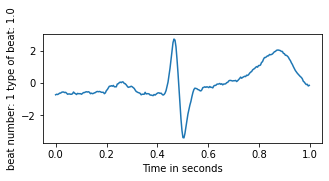

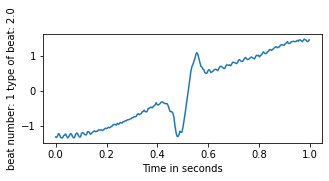

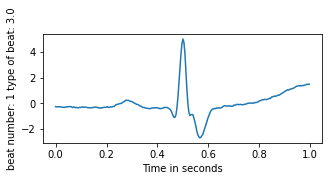

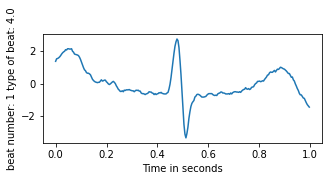

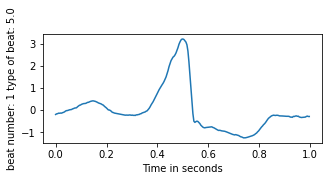

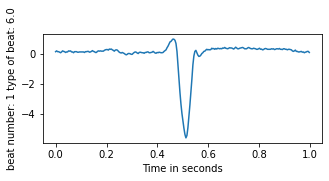

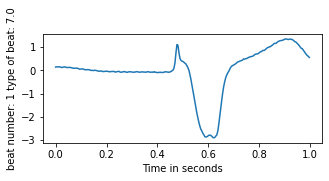

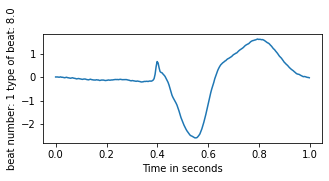

In [11]:
# data = np.loadtxt('/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/notebooks/data_ecg/100_MLII.csv', delimiter=',')
# data = all_data[0]
# print(data.shape)
# print(data[-2], data[-1])

ann_value = all_data[:,-3]
a = all_data[ann_value==1.0][0]
b = all_data[ann_value==2.0][0]
c = all_data[ann_value==3.0][0]
d = all_data[ann_value==4.0][0]
e = all_data[ann_value==5.0][0]
f = all_data[ann_value==6.0][0]
g = all_data[ann_value==7.0][0]
h = all_data[ann_value==8.0][0]
# for i in range(10):
beats = [a,b,c,d,e,f,g,h]
# data = a[0]
for i in beats:
    time_value = np.arange(256, dtype = 'float') / 256
    current_beat = i[:-3]
    ann_num = i[-3]
    plt.figure(figsize=(5,2))
    plt.plot(time_value, current_beat)
    plt.xlabel('Time in seconds')
    plt.ylabel('beat number: ' + str(1) + ' type of beat: ' + str(ann_num))

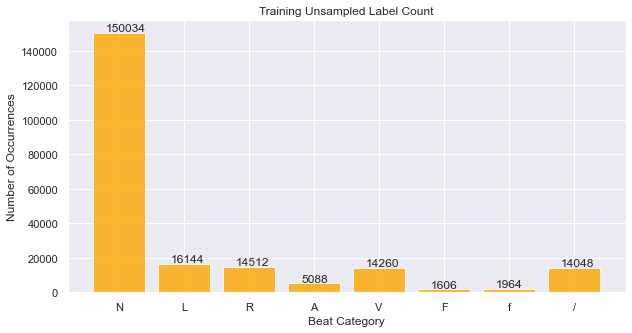

In [12]:
import seaborn as sns
sns.set()
feature_names = ['N','L','R','A','V','F','f','/']

dftrain = pd.DataFrame(all_data)
countstrain = dftrain[256].value_counts()

plt.figure(figsize=(10,5))
barplt = plt.bar(countstrain.index, countstrain.values, alpha=0.8, color='orange')
plt.title('Training Unsampled Label Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Beat Category', fontsize=12)
plt.xticks(ticks=[1,2,3,4,5,6,7,8],labels=feature_names)
for bar in barplt:
    yval = bar.get_height()
    plt.text(bar.get_x()+.2, yval+1000, yval)
plt.show()

In [13]:
shuffled_all = all_data
np.random.shuffle(shuffled_all)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shuffled_all[:,:-3], shuffled_all[:,-3], test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163242, 256)
(54414, 256)
(163242,)
(54414,)


In [15]:
X_train_file = './train_test_imbal/X_train.csv'
y_train_file = './train_test_imbal/y_train.csv'
X_test_file = './train_test_imbal/X_test.csv'
y_test_file = './train_test_imbal/y_test.csv'



with open(X_train_file, 'wb') as f:
    np.savetxt(f, X_train, delimiter=",", fmt='%f')
with open(y_train_file, 'wb') as f:
    np.savetxt(f, y_train, delimiter=",", fmt='%f')
with open(X_test_file, 'wb') as f:
    np.savetxt(f, X_test, delimiter=",", fmt='%f')
with open(y_test_file, 'wb') as f:
    np.savetxt(f, y_test, delimiter=",", fmt='%f')

In [ ]:
# to load from files
# X_train = np.loadtxt('./train_test_imbal/X_train.csv', delimiter=',')
# y_train = np.loadtxt('./train_test_imbal/y_train.csv', delimiter=',')
# X_test = np.loadtxt('./train_test_imbal/X_test.csv', delimiter=',')
# y_test = np.loadtxt('./train_test_imbal/y_test.csv', delimiter=',')

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163242, 256)
(54414, 256)
(163242,)
(54414,)


## SMOTE

In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [30]:
label_count = Counter(y_train)
print(label_count)
classes, counts = np.unique(y_train, return_counts=True)
imbalanced = counts[1:]
imb_max = np.max(imbalanced)
print(imb_max)
normal_count = counts[0]
print(normal_count)

Counter({1.0: 112513, 2.0: 12034, 3.0: 10920, 5.0: 10655, 8.0: 10632, 4.0: 3817, 7.0: 1488, 6.0: 1183})
12034
112513


In [31]:
samp_strat = {1:normal_count,2:imb_max,3:imb_max,4:imb_max,5:imb_max,6:imb_max,7:imb_max,8:imb_max}
sm = SMOTE(random_state=42, sampling_strategy=samp_strat)
X_bal, y_bal = sm.fit_resample(X_train,y_train)
print(Counter(y_bal))

Counter({1.0: 112513, 5.0: 12034, 7.0: 12034, 2.0: 12034, 3.0: 12034, 8.0: 12034, 4.0: 12034, 6.0: 12034})


In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_u,y_u = rus.fit_resample(X_bal,y_bal)

print(Counter(y_u))

Counter({1.0: 12034, 2.0: 12034, 3.0: 12034, 4.0: 12034, 5.0: 12034, 6.0: 12034, 7.0: 12034, 8.0: 12034})


## CF Matrix and Scores Functions

In [33]:
from sklearn.metrics import *
import seaborn as sns
def cf_matrix_func(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    categories=['N', 'L', 'R', 'A', 'V', 'F', 'f','P']
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, 
                fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    
def scores(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision_micro = precision_score(y_test, predictions, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
    precision_macro = precision_score(y_test, predictions, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
    f1_macro = f1_score(y_test, predictions, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
    f1_micro = f1_score(y_test, predictions, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
    return accuracy, precision_macro, precision_micro, f1_macro, f1_micro

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_u, y_u)
# print(model.score(X_test, y_test))
print(model)

KeyboardInterrupt: 

In [ ]:
pred_xgb = model.predict(X_test)

In [ ]:
print(scores(pred_xgb, y_test))
cf_matrix_func(pred_xgb, y_test)

In [ ]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
X_train_3d = X_u.reshape(-1, X_u.shape[1],1)
X_test_3d = X_test.reshape(-1, X_test.shape[1], 1)

print(X_train_3d.shape)
print(X_test_3d.shape)

y_train_cat = to_categorical(y_u)
y_test_cat = to_categorical(y_test)
print(y_train_cat.shape)
print(y_test_cat.shape)

In [ ]:
verbose, epoch, batch_size = 1, 50, 128

def getModel():
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train_3d.shape[1],X_train_3d.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

In [ ]:
model = cnnmodel.fit(X_train_3d, y_train_cat, epochs=epoch, verbose=verbose,batch_size=batch_size)

In [ ]:
cnnpredictions = cnnmodel.predict(X_test_3d, verbose=1)

In [ ]:
cnn_predict = np.argmax(cnnpredictions, axis=1)
true_value = np.argmax(y_test_cat,axis=1)

In [ ]:
score = scores(true_value, cnn_predict)
print(score)
cf_matrix_func(cnn_predict,true_value)